In [144]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/nyc-taxi-trip-duration")

#print("Path to dataset files:", path)
path_to_file = path+'/NYC.csv'
# print(path_to_file)

# Importing necessary libraries

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")

import datetime as dt
import warnings

import matplotlib.pyplot as plt

%matplotlib inline

warnings.simplefilter("ignore")

# Importing Dataset

In [5]:
df = pd.read_csv(path_to_dataset)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Exploring the dataset

In [7]:
print(f"The shape of dataset is : {df.shape}")

The shape of dataset is : (1458644, 11)


In [8]:
print(
    f"It means number of rows are : {df.shape[0]} and number of columns are {df.shape[1]}"
)

It means number of rows are : 1458644 and number of columns are 11


Let's take a look at available columns

In [9]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

Now, let's check the data-type of each column

In [21]:
df.select_dtypes(include="float").columns.to_list()
# df.select_dtypes(include='number').columns.to_list() # # Includes int64, float64, int32, etc.
# df.select_dtypes(include='object').columns.to_list()

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']

Understanding from `dtypes` :
- id, pickup_datetime, dropoff_datetime and store_and_fwd_flag are **objects**
- 'vendor_id', 'passenger_count', 'trip_duration' are **int** types
- 'pickup_longitude','pickup_latitude','dropoff_longitude', 'dropoff_latitude' are **float** types

# Independent Variables

**Trip Identification**
- **id** - A unique identifier for each trip
- **vendor_id** - A code indicating the provider associated with the trip record (e.g., Zola, Uber)

**Temporal Features**
- **pickup_datetime** - Date and time when the meter was engaged
- **dropoff_datetime** - Date and time when the meter was disengaged

**Passenger Information**
- **passenger_count** - The number of passengers in the vehicle (driver-entered value)

**Pickup Location**
- **pickup_longitude** - The longitude coordinate where the ride started
- **pickup_latitude** - The latitude coordinate where the ride started

**Dropoff Location**
- **dropoff_longitude** - The longitude coordinate where the ride ended
- **dropoff_latitude** - The latitude coordinate where the ride ended

**Data Transfer Flag**
- **store_and_fwd_flag** - Indicates whether the trip record was held in vehicle memory before sending to the vendor due to lack of server connection
  - Y = Store and forward trip
  - N = Not a store and forward trip

# Target Variable
**trip_duration** - duration of the trip in seconds

### Check for null values in our dataset

In [25]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no null values **YAY!!**

Let us check for unique values of all columns

In [26]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

- The number of id's are 1458644, which is equal to number of rows in this dataset
- There are 2 unique vendors
- There are 10 unique passengers allover
- There are 2 unique values for store_and_fwd_flag, this we also saw earlier Y or N

Let us finally check some statistical summary of dataset
In this summary we can only include numerical values

In [27]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Insights from above summary : 
- Vendor id has a minumum value of 1 and a maximum of 2 which makes sense as we saw there are 2 vendor ids 1 and 2.
- Passenger count has a minimum of 0 which means either it is an error or the drivers deliberatly entered 0 to complete a target number of rides.
- The minimum trip duration is quite low. We will come back to this later during Univariate Analysis.

# Feature Creation

Let us create some new features from the existing variables so that we can gain more insights from the data.

Remember `pickup_datetime` and `dropoff_datetime` were both of type object.
If we want to make use of this data, we can convert it to **datetime** object which contains numerous functions with which we can create new features that we will see soon.

We can convert it to datetime using the following code.

In [28]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

Let's check again for dtypes

In [30]:
df.dtypes
# pickup_datetime , dropoff_datetime are now datetime

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

Now, let us extract and create new features from this datetime feature we just created.

In [31]:
df["pickup_day"] = df["pickup_datetime"].dt.day_name()
df["dropoff_day"] = df["dropoff_datetime"].dt.day_name()

df["pickup_day_no"] = df["pickup_datetime"].dt.weekday
df["dropoff_day_no"] = df["dropoff_datetime"].dt.weekday

df["pickup_hour"] = df["pickup_datetime"].dt.hour
df["dropoff_hour"] = df["dropoff_datetime"].dt.hour

df["pickup_month"] = df["pickup_datetime"].dt.month
df["dropoff_month"] = df["dropoff_datetime"].dt.month

We have create the following features : 
- pickup_day, dropoff_day which will contain the name of the day on which the ride was taken
- pickup_day_no, dropoff_day_no which will contain the day number instead of characted with Monday = 0 and Sunday = 6
- pickup_hour and dropoff_hour with an hour of the day in the 24-hour format
- pickup_month and dropoff_month with month number with January = 1 and December = 12

Next, We can define a function the let's us determine what time of the day the was taken. 
We can define 4 time zone  : 
- **'Morning'** (from 6:00 am to 11:59 pm),
- **'Afternoon'** (from 12 noon to 3:59 pm),
- **'Evening'** (from 4:00 pm to 9:59 pm),
- **'Late Night'** (from 10:00 pm to 5:59 am)

In [32]:
def time_of_the_day(x):
    if x in range(6, 12):
        return "Morning"
    elif x in range(12, 16):
        return "Afternoon"
    elif x in range(16, 22):
        return "Evening"
    else:
        return "Late night"

Now, let us apply this function and create new columns in the dataset.

In [33]:
df["pickup_timeofday"] = df["pickup_hour"].apply(time_of_the_day)
df["dropoff_timeofday"] = df["dropoff_hour"].apply(time_of_the_day)

Check the dataset till now : 

In [35]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,Monday,0,0,17,17,3,3,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,Sunday,6,6,0,0,6,6,Late night,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,Tuesday,1,1,11,12,1,1,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,Wednesday,2,2,19,19,4,4,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,Saturday,5,5,13,13,3,3,Afternoon,Afternoon


We also saw during the dataset exploration that we have coordinates in the form of Latitude and longitude for pickup and dropoff.
But,  we can't really gather any insights or draw conclusions from that.
So, the most obvious feature that we can extract from this is **distance**. Let us do that.

Importing the library which lets us calculate distance from geographical coordinates.

In [36]:
from geopy.distance import great_circle

Defining a function to take coordinates as inputs and return as distance

In [37]:
def calculate_distance(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    start_coordinates = (pickup_lat, pickup_long)
    stop_coordinates = (dropoff_lat, dropoff_long)
    return great_circle(start_coordinates, stop_coordinates).km

Finally, applying the function to our dataset and creating the feature `distance`

In [39]:
df["distance"] = df.apply(
    lambda x: calculate_distance(
        x["pickup_latitude"],
        x["pickup_longitude"],
        x["dropoff_latitude"],
        x["dropoff_longitude"],
    ),
    axis=1,
)

Now, let us see what the head looks like now with these new feature : 

In [40]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,0,0,17,17,3,3,Evening,Evening,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,6,6,0,0,6,6,Late night,Late night,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,1,1,11,12,1,1,Morning,Afternoon,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,2,2,19,19,4,4,Evening,Evening,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,5,5,13,13,3,3,Afternoon,Afternoon,1.188590


Till now we have successfully completed feature engineering, now we have to draw relationship between them

# Univariate Analysis

The univariate analysis involves studying patterns of **all variables individually**.

### Target Variable

Let us start by analyzing the target variable.

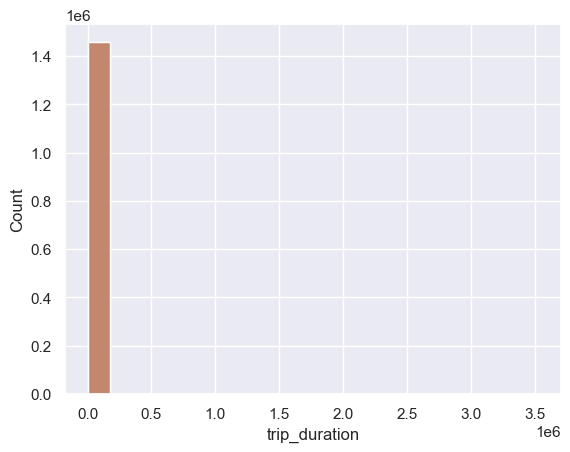

In [43]:
sns.histplot(df["trip_duration"], kde=False, bins=20)
plt.show()

This histogram is really skewed.
Let us also look at the boxplot.

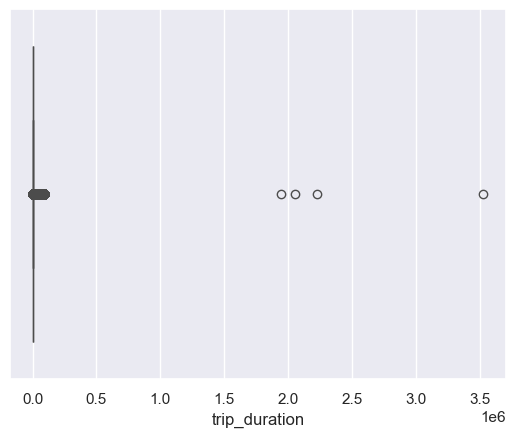

In [50]:
sns.boxplot(data=df, x="trip_duration")
plt.show()

We can clearly see an outlier

In [52]:
df["trip_duration"].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

There are a few entries , that has very abnormal duration
- Like these Indexes - 978383, 924150, 680594, 355003

In [56]:
outlier_index = df[
    (df["trip_duration"] == 3526282)
    | (df["trip_duration"] == 2227612)
    | (df["trip_duration"] == 2049578)
    | (df["trip_duration"] == 1939736)
].index

In [57]:
outlier_index

Index([355003, 680594, 924150, 978383], dtype='int64')

In [58]:
df.drop(outlier_index, inplace=True)

In [59]:
df["trip_duration"].sort_values(ascending=False)

1234291    86392
295382     86391
73816      86390
59891      86387
1360439    86385
           ...  
269418         1
467645         1
533799         1
726971         1
311745         1
Name: trip_duration, Length: 1458640, dtype: int64

### Vendor id

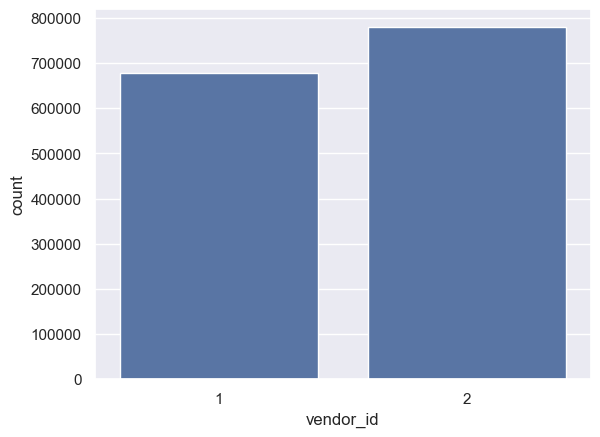

In [61]:
sns.countplot(x="vendor_id", data=df)
plt.show()

We see that there is not much difference between the trips taken by both vendors.

### Passenger Count

In [63]:
df["passenger_count"].value_counts()

passenger_count
1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64

- There are a few trips with 0 passenger count
- Ther is only 1 trip with 8 and 9 passengers

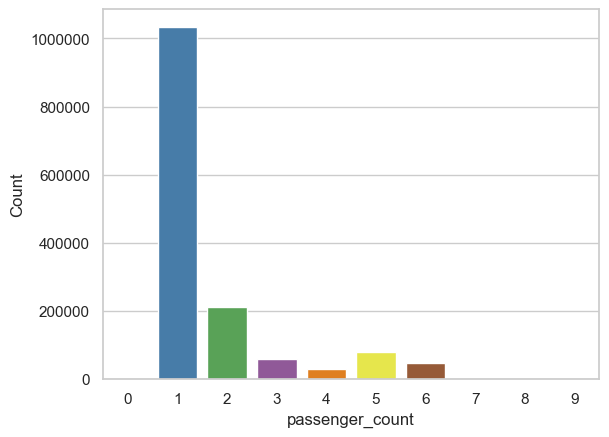

In [70]:
sns.countplot(data=df, x="passenger_count", palette="Set1")
plt.ticklabel_format(style="plain", axis="y")
plt.ylabel("Count")
plt.show()

Note : 
Here i used ticklabel_format, because at y-axis it sns was showing decimal value instead of number

We see the highest amount of trips are with 1 passenger

Let us remove the rows which have 0/7/8/9

In [71]:
df = df[df["passenger_count"] != 0]
df = df[df["passenger_count"] <= 6]

Now, let's see our value again

In [73]:
df["passenger_count"].value_counts()

passenger_count
1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
Name: count, dtype: int64

### Store and forward Flag

In [75]:
df["store_and_fwd_flag"].value_counts(normalize=True)

store_and_fwd_flag
N    0.994486
Y    0.005514
Name: proportion, dtype: float64

In [76]:
df["store_and_fwd_flag"].value_counts(normalize=True).mul(100).round(2)

store_and_fwd_flag
N    99.45
Y     0.55
Name: proportion, dtype: float64

We can see that less than 1% of trips that were stored in the device before forwarding.

### Distance

In [78]:
df["distance"].value_counts()

distance
0.000000    5887
0.000424      50
0.000424      40
0.000424      35
0.000424      29
            ... 
1.584861       1
0.434274       1
3.809274       1
0.563330       1
1.134044       1
Name: count, Length: 1452293, dtype: int64

We see there are 5887 trips were with 0 km distance.
The reasons for 0 km distance can be : 
- The dropoff location couldn't be tracked.
- The driver deliberately took this ride to complete a target ride number.
- The passengers canceled the trip.

We will analyze these trips further in bivariate analysis.

# Bivariate Analysis

### Trips per day

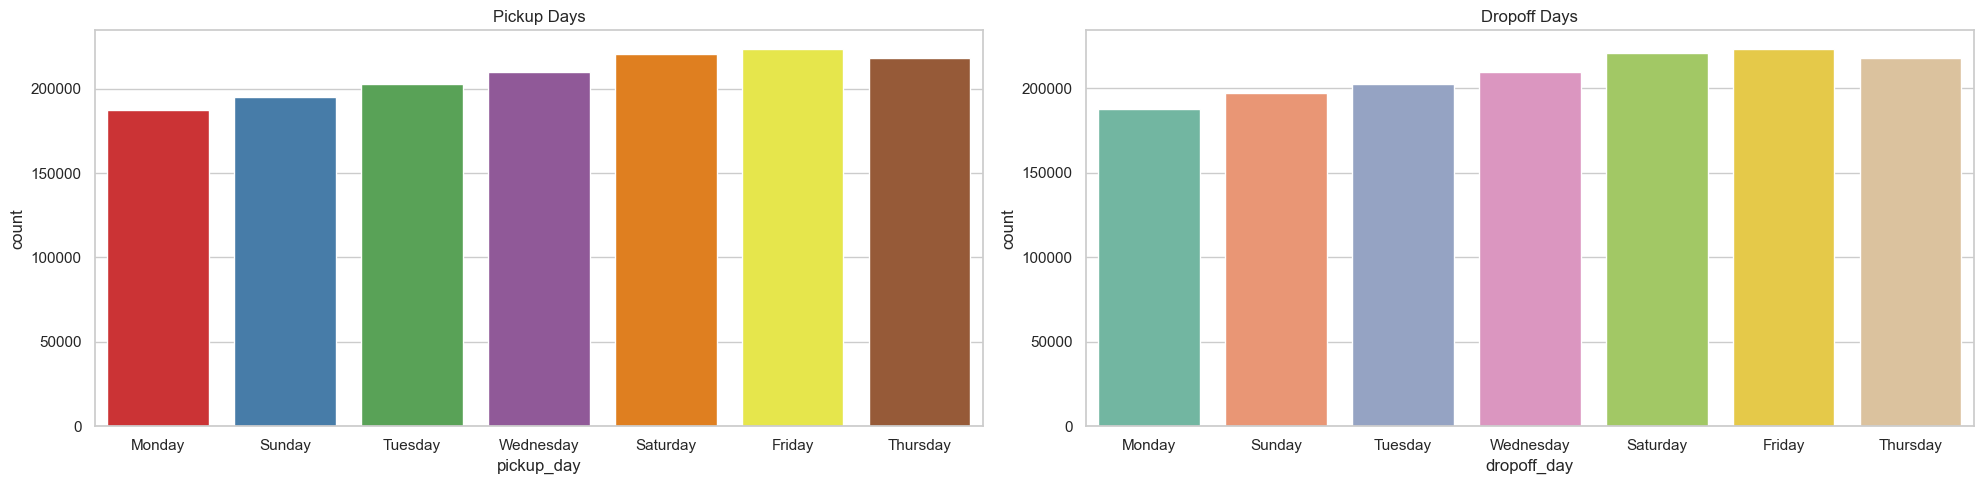

In [84]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.countplot(x="pickup_day", data=df, palette='Set1')
plt.title("Pickup Days")

plt.subplot(1, 2, 2)
sns.countplot(x="dropoff_day", data=df, palette='Set2')
plt.title("Dropoff Days")

plt.tight_layout()
plt.show()

We can see that Fridays are the busiest days followed by Saturdays. That is probably it's Weekend.

### Trips per Hour

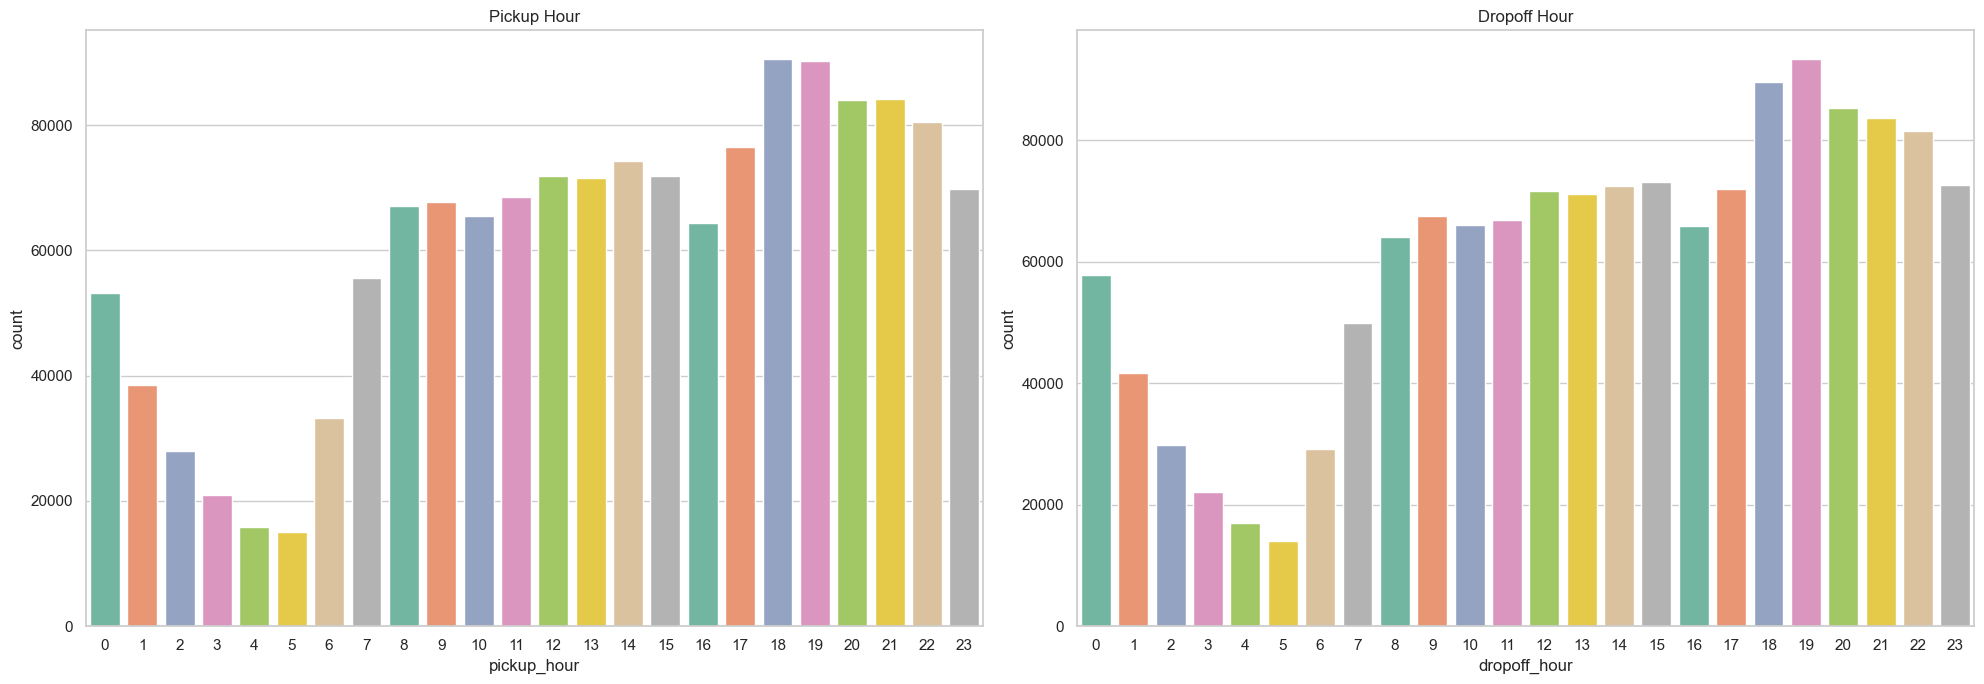

In [88]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.countplot(data=df, x='pickup_hour', palette='Set2')
plt.title('Pickup Hour')

plt.subplot(1,2,2)
sns.countplot(data=df, x='dropoff_hour', palette='Set2')
plt.title('Dropoff Hour')

plt.tight_layout()
plt.show()

We see the busiest hours are 6:00 PM to 7:00 PM and that makes sense as this is the time when people return from their offices.

### Trips per Time of Day

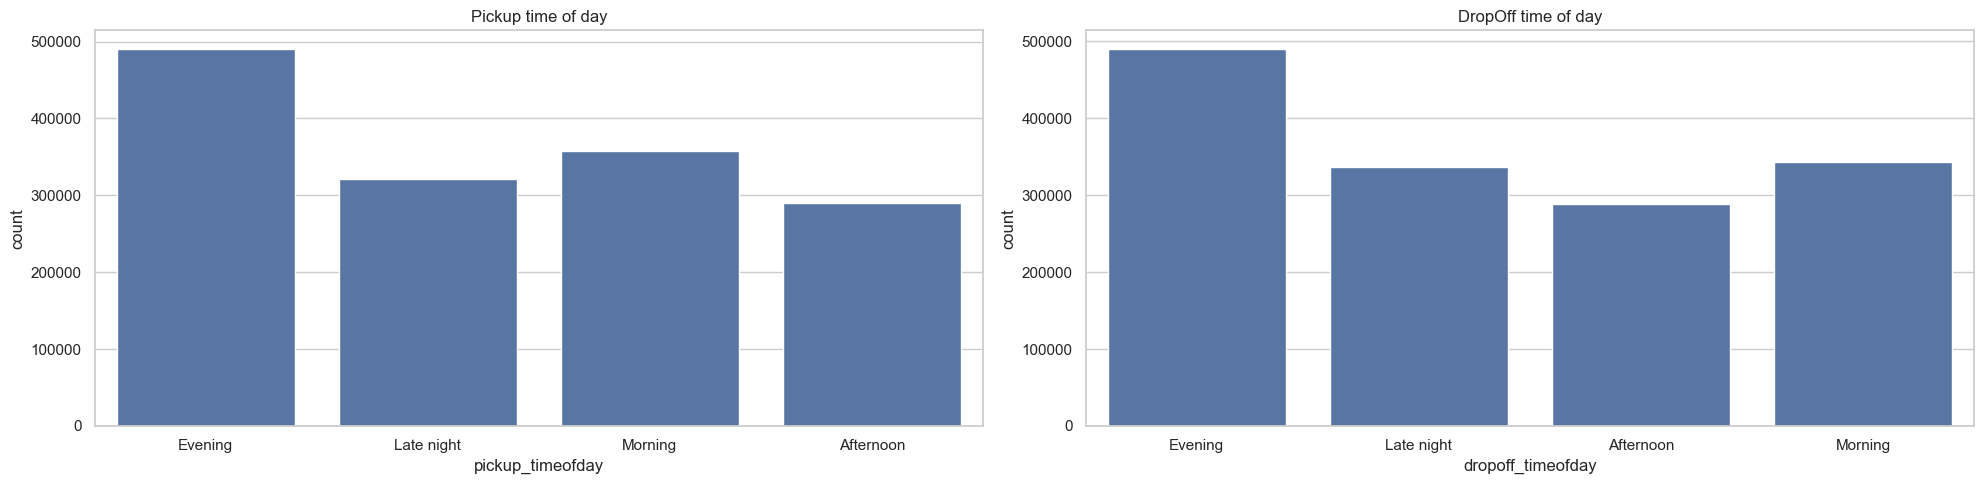

In [91]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Pickup time of day')
sns.countplot(data=df, x= 'pickup_timeofday')

plt.subplot(1,2,2)
plt.title('DropOff time of day')
sns.countplot(data=df, x='dropoff_timeofday')

plt.tight_layout()
plt.show()

As we saw above, evenings are the busiest.

### Trips per month


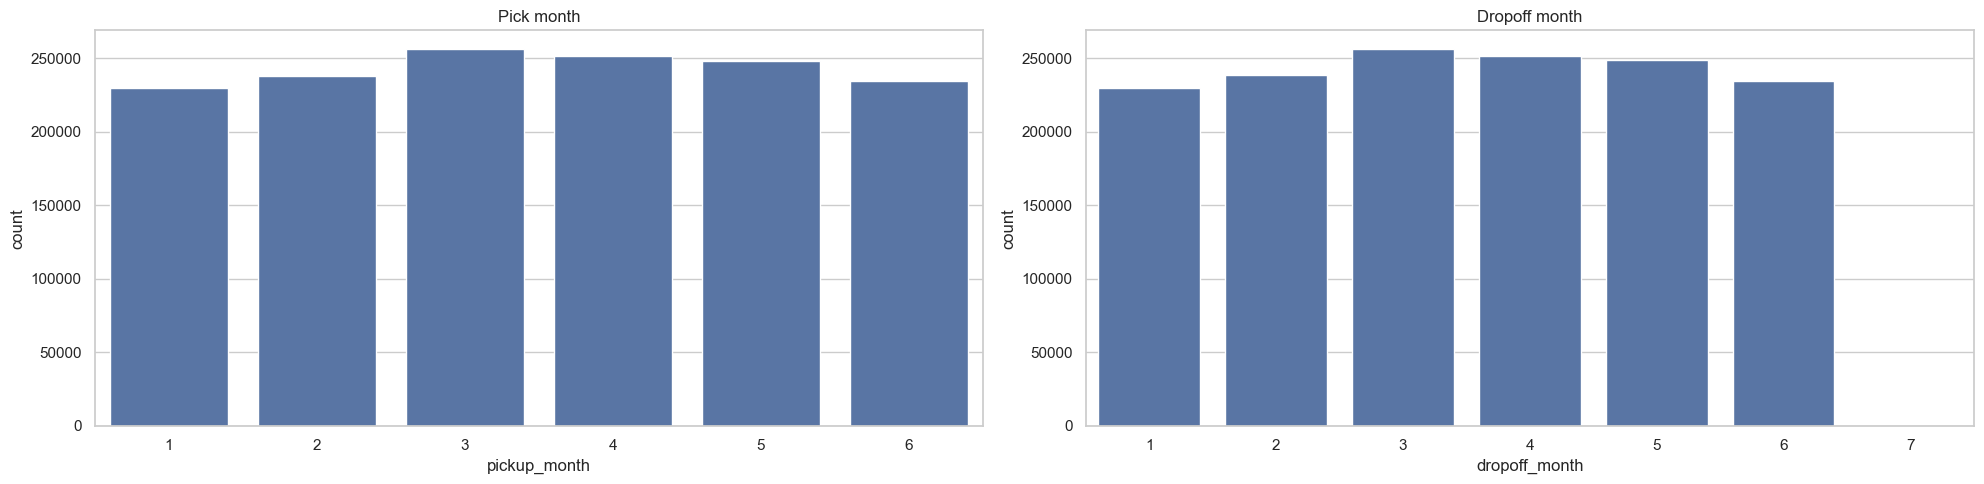

In [92]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Pick month')
sns.countplot(data=df, x='pickup_month')

plt.subplot(1,2,2)
plt.title('Dropoff month')
sns.countplot(data=df, x='dropoff_month')

plt.tight_layout()
plt.show()

There is not much difference in the number of trips across months.\
Now, we will analyze all these variables further in bivariate analysis

# Bivariate Analysis

Bivariate Analysis involves finding relationships, patterns and correlations between two variables.

### Trip Duration per Vendor

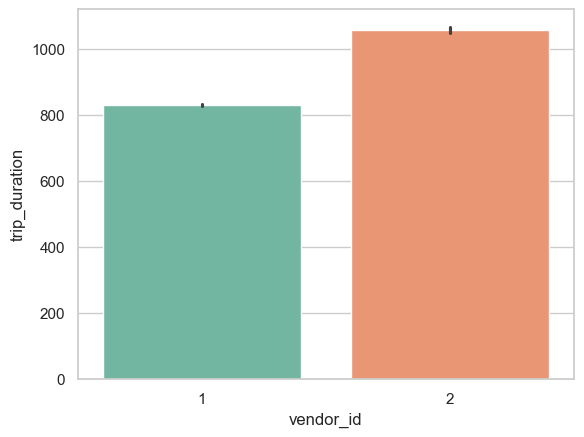

In [96]:
sns.barplot(y='trip_duration', x='vendor_id', data=df, estimator=np.mean, palette='Set2')
plt.show()

Vendor id 2 takes longer trips as compared to vendor 1

### Trip Duration per Store and forward Flag

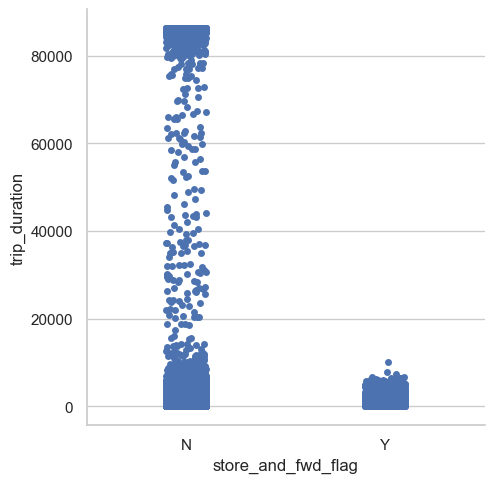

In [102]:
plt.close('all')
sns.catplot(y='trip_duration', x='store_and_fwd_flag', data=df, kind='strip')
plt.show()

Trip duration is generally longer for trips whose flag was not stored

### Trips Duration per passenger count

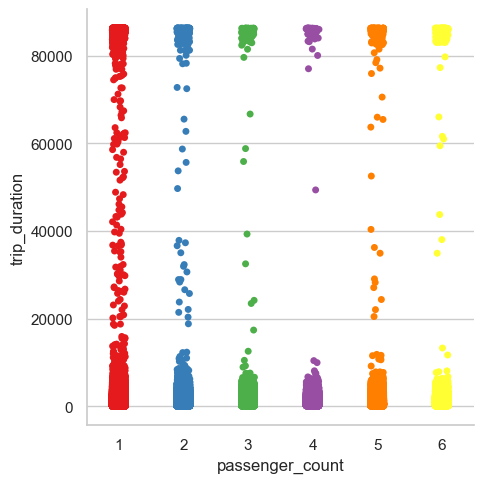

In [111]:
plt.close('all')
sns.catplot(y='trip_duration', x='passenger_count', data=df, kind='strip', palette='Set1')
plt.show()

There is no visible relation between trip duration and passenger count

### Trip Duration per hour

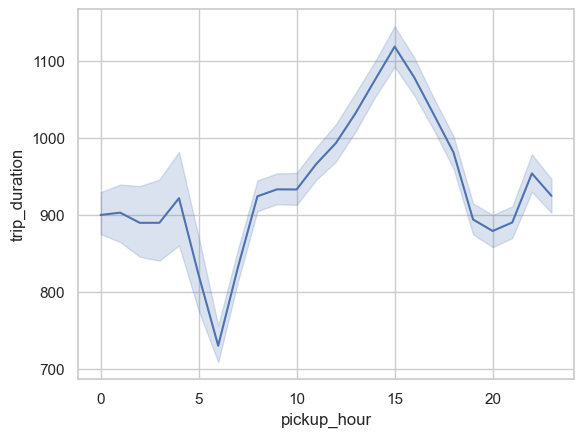

In [112]:
plt.close('all')

sns.lineplot(data=df, x='pickup_hour', y = 'trip_duration')
plt.show()

We see that the trip duration is the maximum around 3 PM which may be because of traffic on the roads.\
Trip duration is the lowest round 6 AM as streets may not be easy.

### Trip duration per time of day

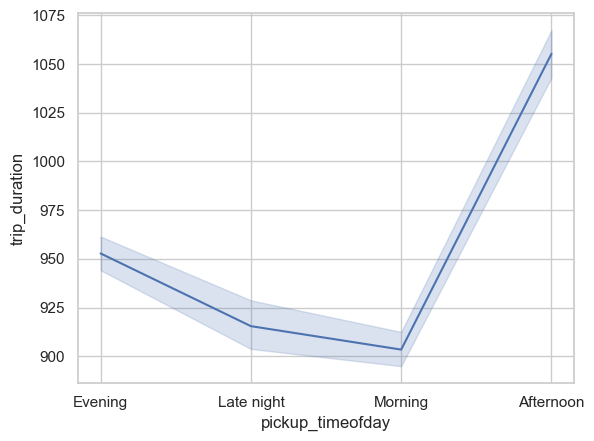

In [113]:
plt.close('all')
sns.lineplot(x='pickup_timeofday', y='trip_duration', data=df)

plt.show()

As we saw above, trip duration is the maximum in the afternoon and lowest between late night and morning.

### Trip duration per Day of Week

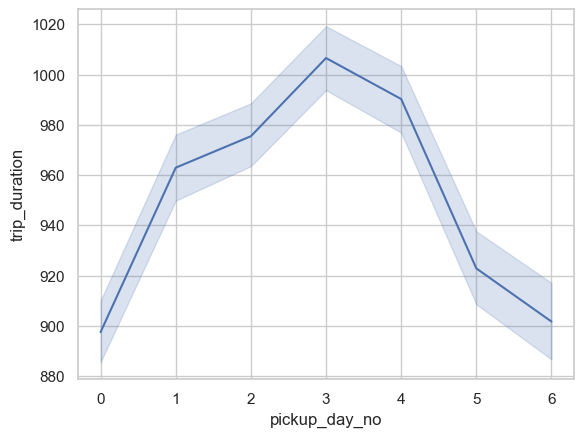

In [115]:
plt.close('all')
sns.lineplot(x='pickup_day_no', y='trip_duration', data=df)
plt.show()

Trip duration is the longest on Thursdays closely followed by Fridays.

### Trip Duration per month

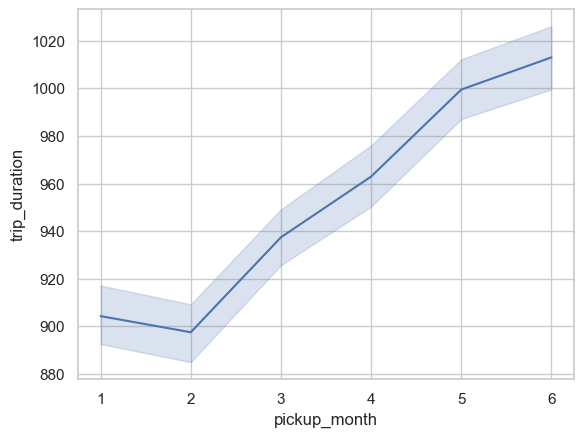

In [116]:
plt.close('all')
sns.lineplot(x='pickup_month', y='trip_duration', data=df)
plt.show()

From February, we can see trip duration rising every month

### Distance and Vendor

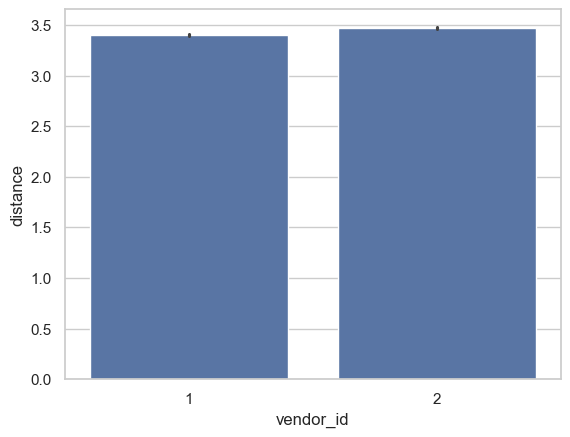

In [118]:
plt.close('all')
sns.barplot(y='distance', x='vendor_id', data=df, estimator=np.mean)
plt.show()

The distribution for both vendors is very similar.

### Distance and  Store and forward flag

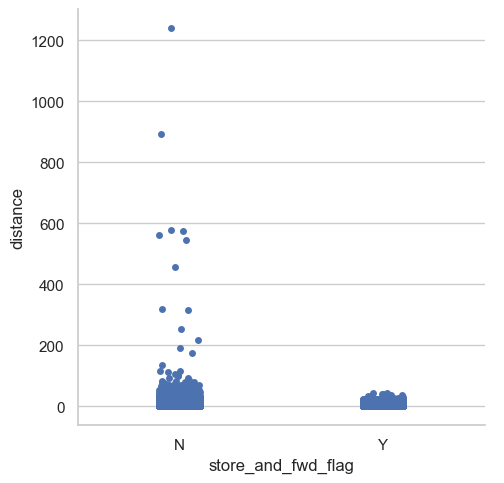

In [119]:
plt.close('all')
sns.catplot(x='store_and_fwd_flag', y='distance', data=df)
plt.show()

We can see for longer distances the trip is not stored.

### Distance per passenger count

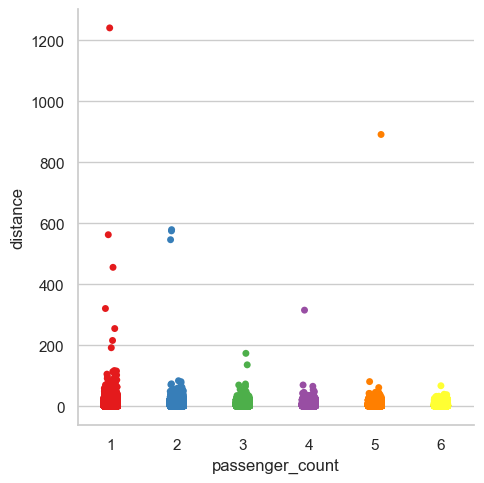

In [124]:
plt.close('all')
sns.catplot(y='distance', x='passenger_count', data=df, kind='strip', palette='Set1')
plt.show()

We see some of the longer distance are covered by either 1 or 2 or 4 passenger rides.

### Distance per day of week

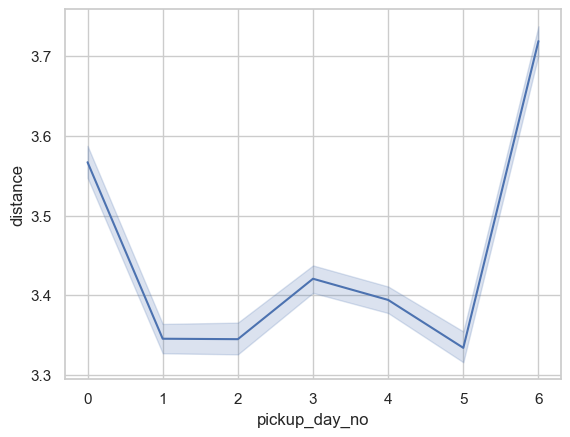

In [127]:
plt.close('all')
sns.lineplot(x='pickup_day_no', y='distance', data=df)
plt.show()

- Distances are longer on Sundays probably because it's weekend.
- Monday trip distance are also quite high.
- This probably means that there can be outstation trips on these days and/or the streets are busier.

### Distance per hour of the day

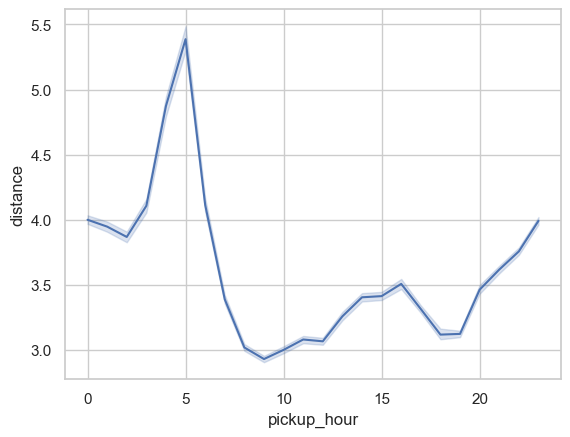

In [128]:
plt.close('all')
sns.lineplot(x='pickup_hour', y='distance', data=df)
plt.show()

Distance are longer around 5 AM.

### Distance per time of day

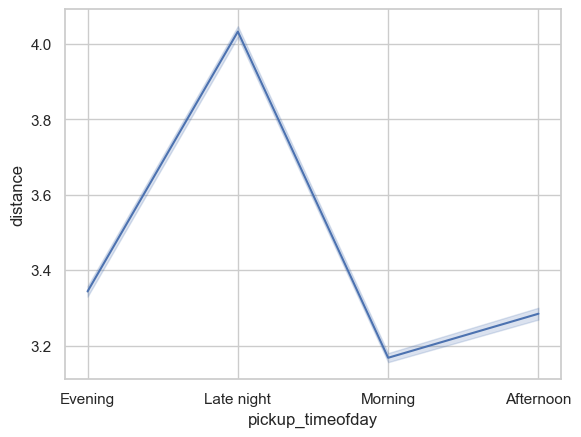

In [129]:
plt.close('all')
sns.lineplot(x='pickup_timeofday', y='distance', data=df)
plt.show()

Distances being the longest during late night or it maybe called as early morning too.\
This can probably point to outstation trips where people start early for the day

### Distance per month

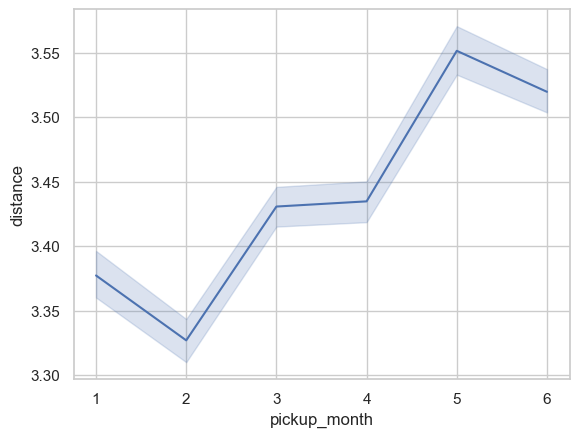

In [130]:
plt.close('all')
sns.lineplot(x='pickup_month', y='distance', data=df)
plt.show()

As we also saw during trip duration per month, similarly trip distance is the lowest in February and the maximum in June.

### Passenger Count and Vendor id

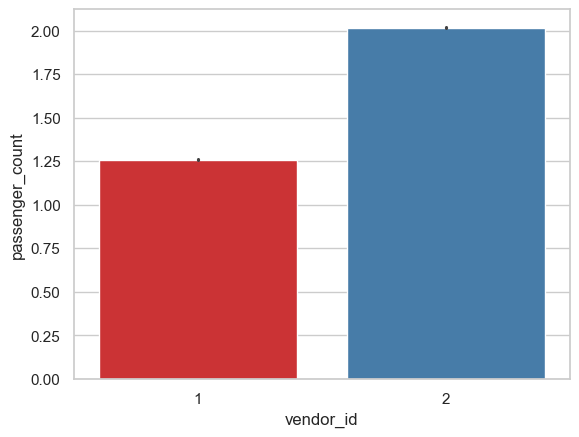

In [132]:
plt.close('all')
sns.barplot(y='passenger_count', x='vendor_id', data=df, palette='Set1')
plt.show()

This shows that vendor 2 generally carries 2 passengers while vendor 1 carries 1 passenger rides.

### Trip Duration and Distance

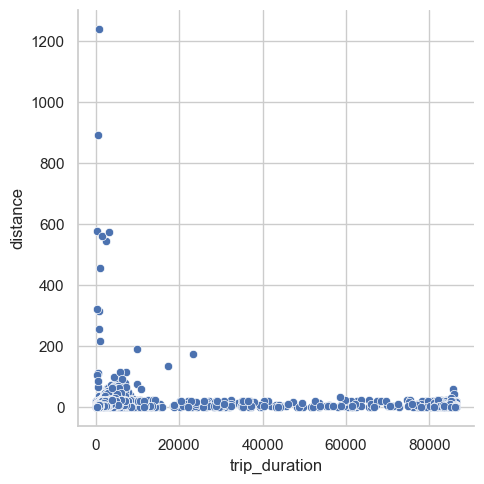

In [133]:
plt.close('all')
sns.relplot(y='distance', x='trip_duration', data=df)
plt.show()

This is interesting.\
We can see that there are trips with zero distance yet there duration is high.\

Let us see few rows whose distance are 0

In [135]:
df[df['distance']==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,...,Monday,0,0,18,18,2,2,Evening,Evening,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,...,Tuesday,1,1,18,18,5,5,Evening,Evening,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,...,Monday,0,0,23,23,5,5,Late night,Late night,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,...,Monday,0,0,19,19,1,1,Evening,Evening,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,...,Wednesday,2,2,22,22,1,1,Late night,Late night,0.0


It could be because :
- The dropoff coordinates weren't recorded
- Another reason could be that passenger changed their mind and cancelled the ride after some time.

In [136]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,0,0,17,17,3,3,Evening,Evening,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,6,6,0,0,6,6,Late night,Late night,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,1,1,11,12,1,1,Morning,Afternoon,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,2,2,19,19,4,4,Evening,Evening,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,5,5,13,13,3,3,Afternoon,Afternoon,1.188590
